# Exercise 2 Web Crawler

A Web crawler, sometimes called a spider or spiderbot and often shortened to crawler, is an Internet bot that systematically browses the World Wide Web, typically for the purpose of Web indexing (web spidering).

Web search engines and some other sites use Web crawling or spidering software to update their web content or indices of others sites' web content. Web crawlers copy pages for processing by a search engine which indexes the downloaded pages so users can search more efficiently.

So,Web crawlers become a common program for beginners of python due to their practicality and simplicit.

**Let's begin!!!**

## 1. Framework
Crawler architecture mainly consists of five parts, which are **Scheduler**,**URL manager**, **Web downloader**, **Web parser**, and **Outputer** (valuable data crawled).

**Scheduler**:It is mainly responsible for scheduling coordination among URL managers, downloaders, and parsers.

**URL manager**:Including the URL address to be crawled and the URL address has been crawled, to prevent repeated URL crawling and circular URL crawling, URL manager to achieve mainly in three ways, through memory, database, cache database to achieve. 

**Web downloader**:Convert the page into a string by passing in a URL to download the page and the page loader has urllib2 (Python official base module) including requirements for login, proxy, and cookie, requests(third party package)

**Web parser**:Parsing a web string can be done to extract the information we need, or it can be done according to the way the DOM tree is parsed.Page parser is a regular expression (intuitive, the web into a string by means of the fuzzy matching to extract valuable information, when the document is more complex, the method to extract the data will be very difficult), HTML parser (Python's built-in), beautifulsoup (third party plug-ins, you can use the Python built-in HTML. The parser to parse, can also use the LXML parse, relative to other more powerful some), LXML (third party plug-ins,XML and HTML can be parsed), html.parser and beautifulsoup as well as LXML are all parsed as DOM trees.

**Outputer**:An output of the data extracted from the web page

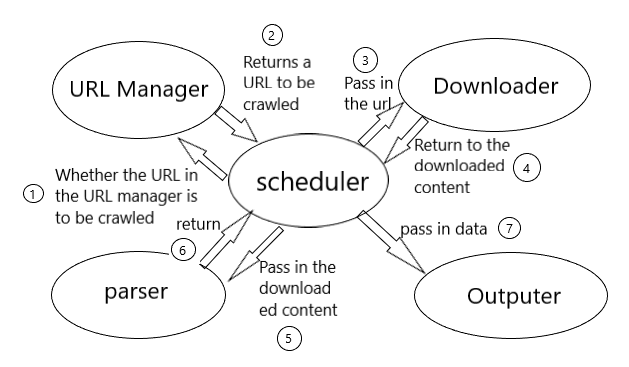

**The basic flow**

1.Whether the URL in the URL manager is to be crawle;

2.Returns a URL to be crawled;

3.Pass in a URL to be crawled and download the web page to which the URL points;

4.Return to the downloaded web content;

5.Transfer the downloaded web page content to the parser for parsing;

6.The parser returns the information we need;

7.Gather valuable information together to form an output.


## 2.Two components

Let's start with two components:__urllib2__ ——>download,__beautiful soup__——>parse html

### 2.1.Use urllib2 to download web pages


First,we import __cookielib__ and __urllib2__ in python2,these are used to download web pages. 

In [ ]:
from http import cookiejar
import urllib.request
import urllib.error

#noted:if you used python 2.x,you can directily use
#import cookielib
#import urllib2
#but we used python3

In [ ]:
# First method
url="http://baidu.com"
response1=urllib.request.urlopen(url)
print('get status code:')
print(response1.getcode())
#Get status code,if code=200,indicates success
print('get the length of the web content:')
print(len(response1.read()))
#Gets the length of the web content

In [ ]:
#Second method:Add urllib2's ability to handle cookies
cookie=cookiejar.CookieJar()
opener=urllib.request.build_opener(urllib.request.HTTPCookieProcessor(cookie))
urllib.request.install_opener(opener)
response3=urllib.request.urlopen(url)
print(response3.getcode())
print(len(response3.read()))
print(cookie)

### 2.2. Beautiful Soup:Extract data from XML and HTML

#### 1. INSTALL Beautiful Soup
Open CMD (command prompt), enter Python, and enter dir to see if pip.exe is available. If yes, you can install the PIP command that comes with Python.

pip install beautifulsoup4

#### 2.Test for successful installation
input

In [ ]:
import bs4
print(bs4)

Run the file, and install successfully if the output works.

#### 3.use Beautiful Soup parse html

In [ ]:
import re
from bs4 import BeautifulSoup

In [ ]:
html_doc="""
<html><head><title>The Dormouse's story</title></head>
<body>
<p class="title"><b>The Dormouse's story</b></p>
<p class="story">Once upon a time there were three little sisters; and their names were
<a href="http://example.com/elsie" class="sister" id="link1">Elsie</a>,
<a href="http://example.com/lacie" class="sister" id="link2">Lacie</a> and
<a href="http://example.com/tillie" class="sister" id="link3">Tillie</a>;
and they lived at the bottom of a well.</p>
<p class="story">...</p>
"""


In [ ]:
#Create a BeautifulSoup parse object
soup = BeautifulSoup(html_doc,"html.parser",from_encoding="utf-8")

In [ ]:
#get all the links
links=soup.find_all('a')
print("all links:")
for link in links:
    print(link.name,link['href'],link.get_text())

In [ ]:
print("Get a specific URL address")
link_node = soup.find('a',href="http://example.com/elsie")
print(link_node.name,link_node['href'],link_node['class'],link_node.get_text())

In [ ]:
print("Regular expression matching")
link_node = soup.find('a',href=re.compile(r"ti"))
print(link_node.name,link_node['href'],link_node['class'],link_node.get_text())


In [ ]:
print("Gets the text of paragraph P")
p_node = soup.find('p',class_='story')
print(p_node.name,p_node['class'],p_node.get_text())

## 3.Formal learning
We need to manufacture five components separately:**Scheduler**,**URL manager**, **Web downloader**, **Web parser**, and **Outputer**

### 3.1 URL manager:
it needs 4 funtions:

__1.__Add a new url to the manager;

__2.__Add pieces of new urls to the manager:

__3.__Determine if there is a new crawl url in the manager;

__4.__Get a new url from the manager

Complete a web crawler and start crawling to get reviews on douban

In [ ]:
#create a class:
class UrlManager(object):
    def __init__(self):
        self.new_urls=set()
        self.old_urls=set()
#add a new_url to a manager:
    def add_new_url(self):
        #please write your implentation
        

# add pieces of new_urls to the manager:
    def add_new_urls(self):
        
        
        
#Determine if there is a new crawl url in the manager:
    def has_new_url(self):
        
        
        
#Get a new url from the manager
    def get_new_url(self):
        
        
        

### 3.2 HtmlDownloader:
Implement a downloader:use urllib

In [ ]:
class HtmlDownloader(object):
    
    def download(self):
        

### 3.3 HtmlParser:
parse the html:

In [ ]:
import re

In [ ]:
#parse the title from the new url
class HtmlParser(object):
    
    #parse URL
    def _get_new_urls(self,page_url,soup):
        
        
    #parse content and summary   
    def _get_new_data(self,page_url,soup):
        
        #<html class="ua-windows ua-webkit" lang="zh-cmn-Hans"><head><title>简练，平易，全面（聚焦取向的心理治疗）书评</title>
        
    def parse(self,page_url,html_cont):
        
        

### 3.4 HtmlOurputer:

collect data and output data:

In [ ]:
class HtmlOutputer(object):
    def __init__(self):
        self.datas=[]
        
    def collect_data(self,data):
        
        
    def output_html(self):
        
        

### 3.5 scheduler
schedule all components:

In [ ]:
class SpiderMain(object):
    def __init__(self):
        self.urls=UrManager()
        self.downloader=HtmlDownloader()
        self.parser=HtmlParser()
        self.outputer=HtmlOutputer()
    
    #schedule all components:
    def craw(self,root_url):
        

In [ ]:
if __name__=="__main__":
    root_url="https://movie.douban.com/review/9590000/"# the entrance of url
    obj_spider=SpiderMain()
    obj_spider.craw(root_url)